# Problem Set 6 - Matias Castro Tapia

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

We know that for the $\delta$ function we have that $\delta(x)*f(x)=\int_{-\infty}^{\infty}\delta(x-t)f(t)dt=f(x)$, then if we shift $x$ in the $\delta$ function as $x\rightarrow{x-h}$, we will have $\delta(x-h)*f(x)=\int_{-\infty}^{\infty}\delta(x-h-t)f(t)dt=f(x-h)$.

We also know that $FT[g(x)*f(x)]=FT[g(x)]FT[f(x)]=G(k)F(k)$. Then, we have to know the Fourier transform for the $\delta$ function:
$$FT[\delta(x-h)](k)=\int_{-\infty}^{\infty}\delta(x-h)e^{-2\pi i kx}dx=e^{-2\pi ikh}$$

Because $\int_{-\infty}^{\infty}\delta(x)g(x)dx=g(0)$. Finally:
$$f(x-h)=IFT\{F(k)e^{2\pi i kh}\}$$
If we take the discrete (or fast Fourier transform) for an array of lenght $N$:
$$f(x-h)=IDFT\{F(k)e^{2\pi i kh/N}\}$$


I defined the routine shiftd to take the shift of a function by an amount h using the Fourier transform as described above.

In [11]:
def shiftd(f,h,x):
    N=len(f)
    k=np.arange(N)
    del_ft=np.exp(-2*np.pi*1j*k*h/N)
    f_ft=np.array([sum(f*np.exp(-2*np.pi*l*(x+N)*1j/N)) for l in k])
    f_shift=np.array([sum(f_ft*del_ft*np.exp(2*np.pi*k*y*1j/N)) for y in x])
    return np.real(f_shift)/N

In [14]:
x=np.linspace(-60,60,121)
gauss=np.exp(-0.5*((x/15)**2))
sh_gauss=shiftd(gauss,60,x)

Now we can take a Gaussian shifted by a half of the length of the array.

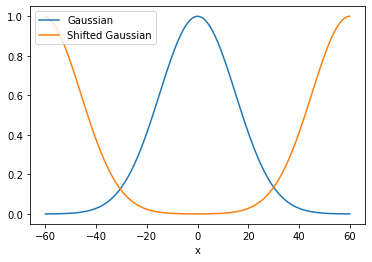

In [18]:
plt.plot(x,gauss,label='Gaussian')
plt.plot(x,sh_gauss,label='Shifted Gaussian')
plt.xlabel('x')
plt.legend()
plt.show()

# Problem 2

a) I wrote the routine corrdf to take the correlation function using the DFT as defined in the instruction $f\star{g}=IDFT[F(k)G^{*}(k))]$

In [19]:
def corrdf(f,g,x):
    N=len(f)
    k=np.arange(N)
    f_ft=np.array([sum(f*np.exp(-2*np.pi*l*(x+N)*1j/N)) for l in k])
    g_ft=np.array([sum(g*np.exp(-2*np.pi*l*(x+N)*1j/N)) for l in k])
    corr_ift=np.array([sum(f_ft*np.conj(g_ft)*np.exp(2*np.pi*k*y*1j/N)) for y in x])
    return np.real(corr_ift/N)

And I took the correlation of a Gaussian with itself.

In [21]:
gcdf_self=corrdf(gauss,gauss,x)

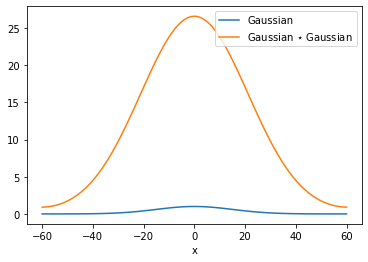

In [22]:
plt.plot(x,gauss,label='Gaussian')
plt.plot(x,gcdf_self,label='Gaussian $\star$ Gaussian')
plt.xlabel('x')
plt.legend()
plt.show()

b) I defined the routine corrdf_h to take two arrays, shift them for an amount h, and then take the correlation $f(x-h)\star g(x-h)$. For this, I used the routine defined in Problem 1 to shift a function and used the correlation taking DFT as described in part a).

In [28]:
def corrdf_h(f,g,h,x):
    N=len(f)
    k=np.arange(N)
    f=shiftd(f,h,x)
    f_ft=np.array([sum(f*np.exp(-2*np.pi*l*(x+N)*1j/N)) for l in k])
    g_shift=shiftd(g,h,x)
    g_shift_ft=np.array([sum(g_shift*np.exp(-2*np.pi*l*(x+N)*1j/N)) for l in k])
    corr_ift=np.array([sum(f_ft*np.conj(g_shift_ft)*np.exp(2*np.pi*k*y*1j/N)) for y in x])
    return np.real(corr_ift/N)

Then I took different values of h and saw the correlation for the Gaussian with a shifted Gaussian. The result was: when taking an integer value the correlation has a critical point in x=h, for other cases the maximum of the correlation oscillates. Probably it occurs because we are using a shift routine that is periodic when using DFT.

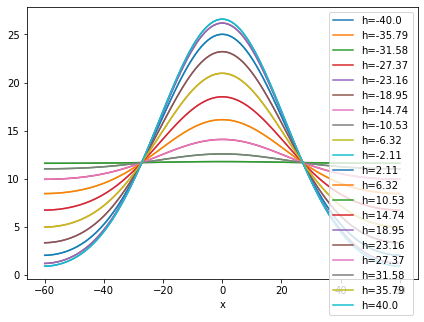

In [49]:
plt.figure(figsize=(7,5))
h=np.linspace(-40,40,20)
for i in h:
    gc=corrdf_h(gauss,gauss,i,x)
    plt.plot(x,gc,label='h='+str(round(i,2)))
plt.xlabel('x')
plt.legend()
plt.show()

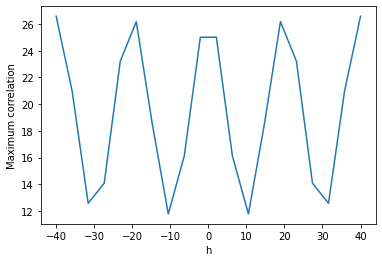

In [51]:
plt.plot(h,[np.max(corrdf_h(gauss,gauss,i,x)) for i in h])
plt.xlabel('h')
plt.ylabel('Maximum correlation')
plt.show()

# Problem 3

I defined the routine conv to make the convolution of two arrays using the FFT from numpy, I added some zeros to the input array an fixed the output lenght taking output[N/2+1:3N/2+1] for N=original length of the array. I realized how to take this output by looking at the plot of the output and knowing that the convolution of a Gaussian with itself should be a Gaussian centered in at the same x.

In [52]:
def conv(f,g,nz=1000):
    N=len(f)
    f_new=np.array(list(f)+[0]*nz)
    g_new=np.array(list(g)+[0]*nz)
    f_ft=np.fft.fft(f_new)
    g_ft=np.fft.fft(g_new)
    conv_ft=f_ft*g_ft
    return np.real(np.fft.ifft(conv_ft))[N//2+1:3*N//2+1]

In [57]:
gcon=conv(gauss,gauss)

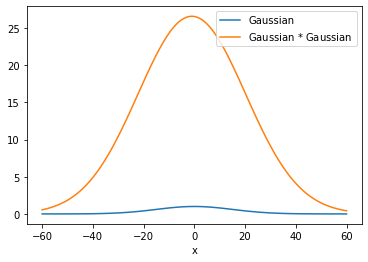

In [59]:
plt.plot(x,gauss,label='Gaussian')
plt.plot(x,gcon,label='Gaussian $*$ Gaussian')
plt.xlabel('x')
plt.legend()
plt.show()

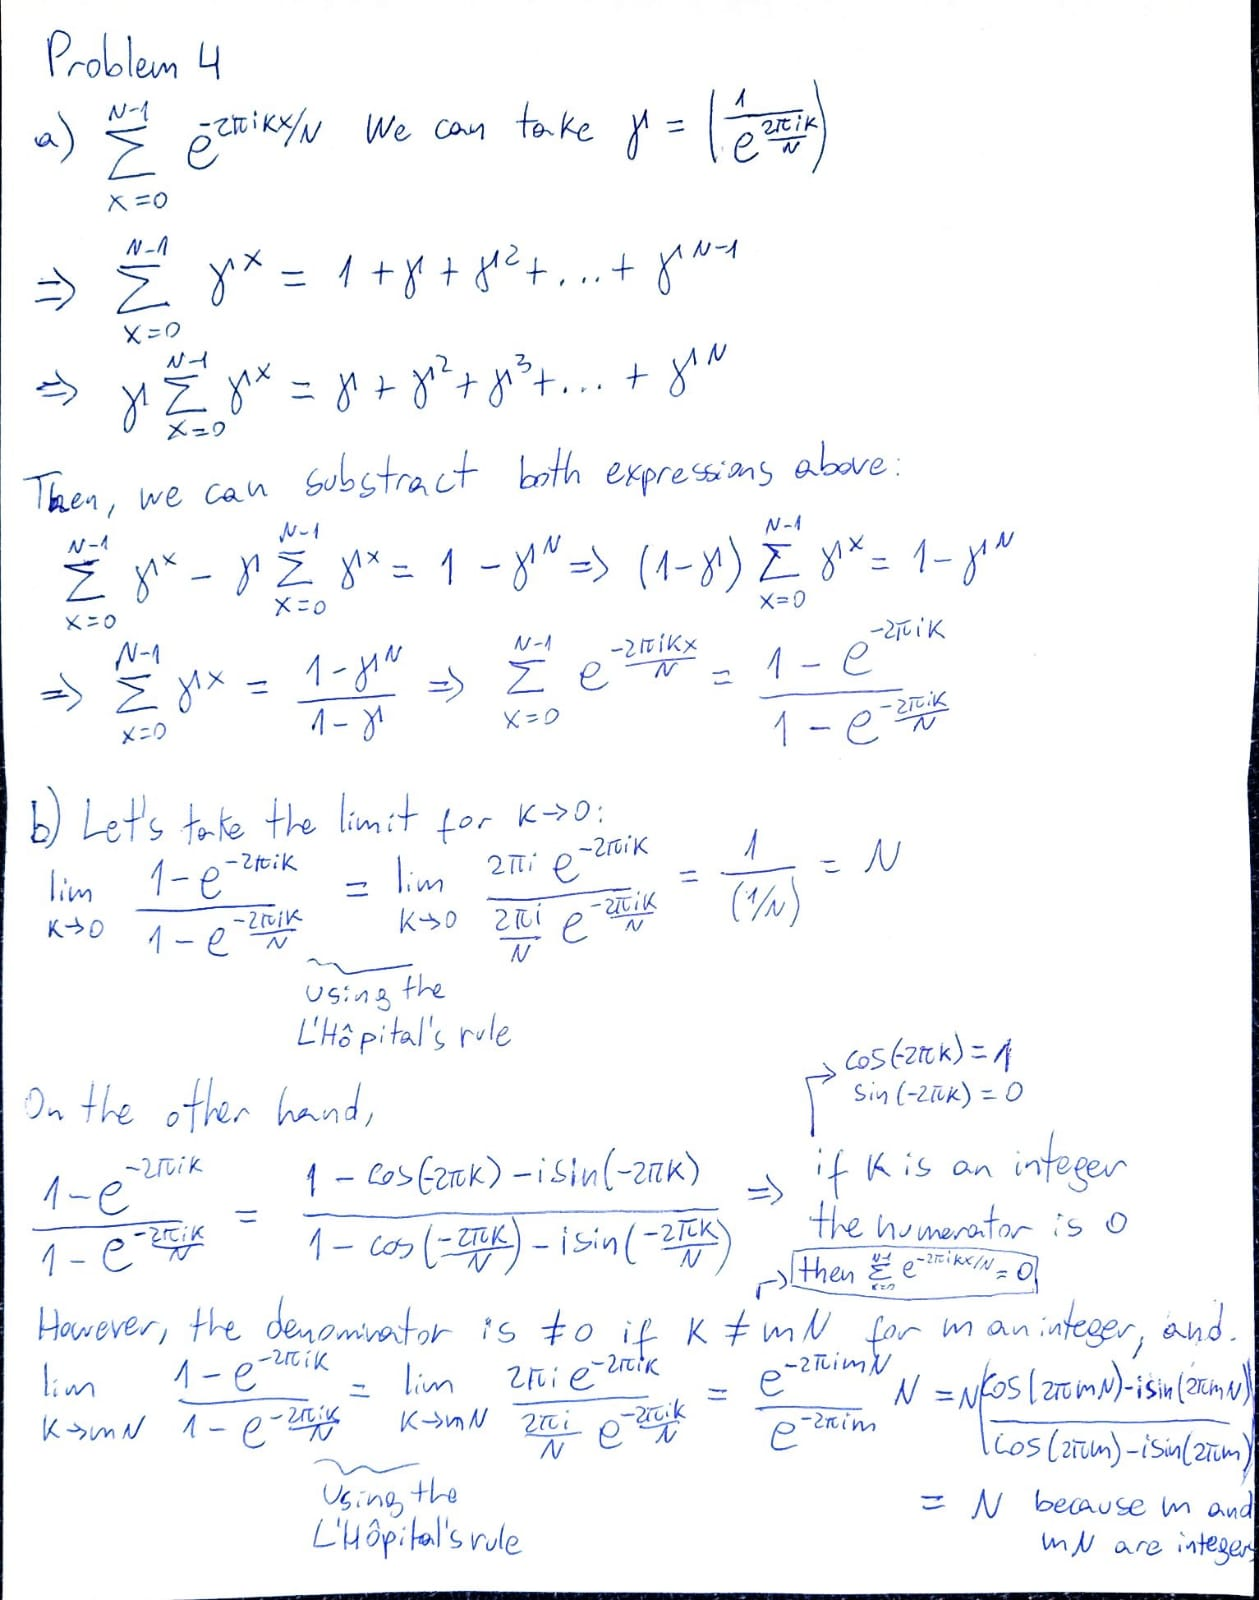

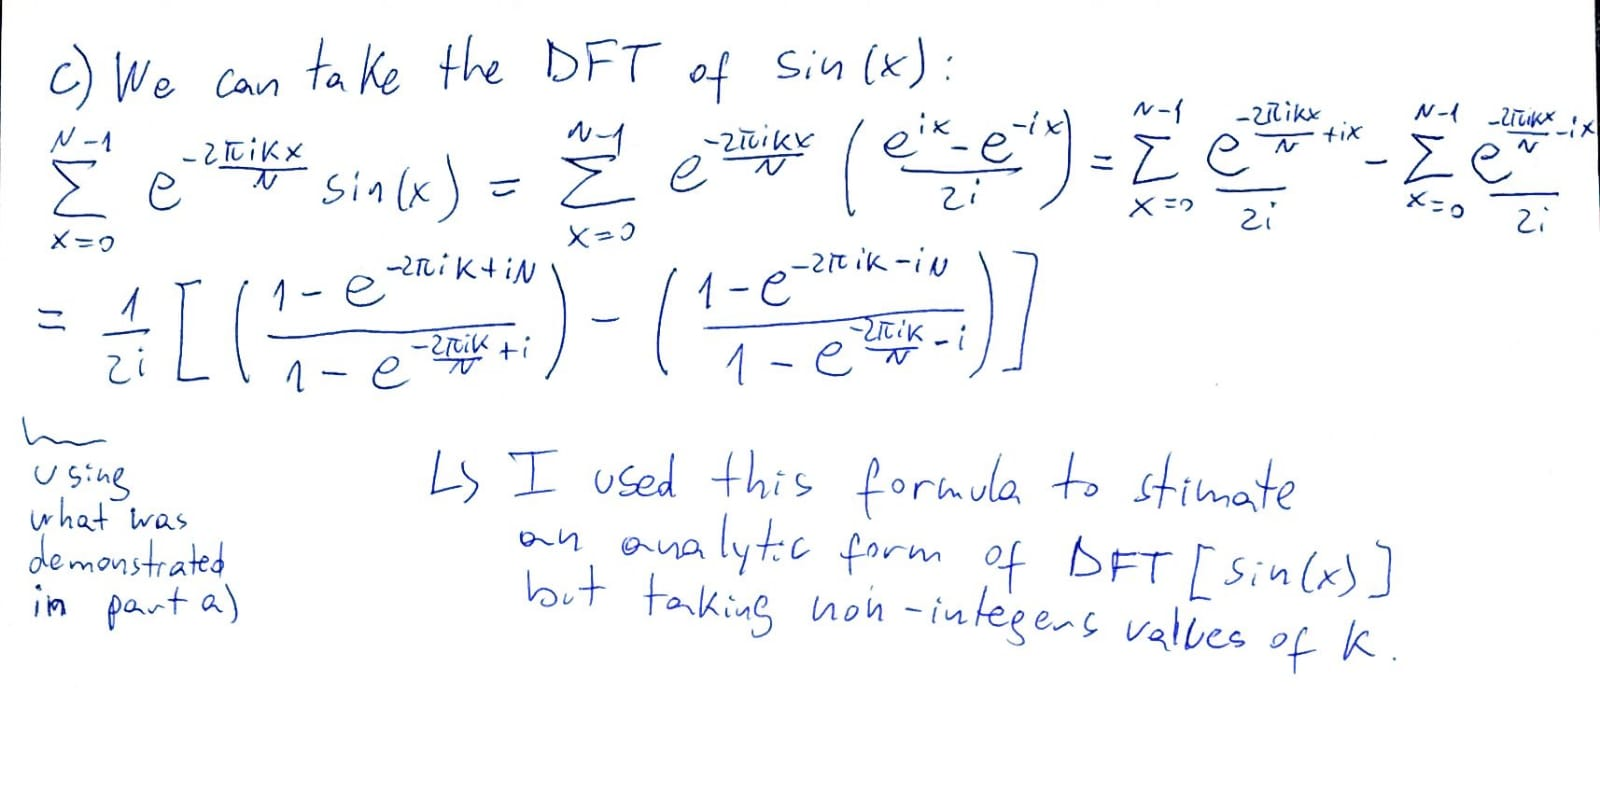

I defined the routine sin_dft to take the DFT of $\sin(x)$ using non-integers values of k.

In [116]:
xx=np.linspace(0,50,51)

In [77]:
def sin_dft(x,k):
    N=len(x)
    df1=(1/(2j))*(1-np.exp(-2*np.pi*1j*k+1j*N))/(1-np.exp((-2*np.pi*1j*k/N)+1j))
    df2=(1/(2j))*(1-np.exp(-2*np.pi*1j*k-1j*N))/(1-np.exp((-2*np.pi*1j*k/N)-1j))
    return df1-df2

kk are non-integers values of k.

In [106]:
kk=np.linspace(0,50,100)

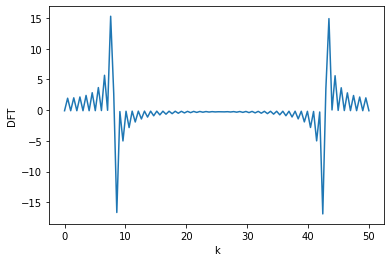

In [108]:
plt.plot(kk,np.real(sin_dft(xx,kk)),'-')
plt.xlabel('k')
plt.ylabel('DFT')
plt.show()

Now we can take the FFT of $\sin(x)$ to compare what I obtained.

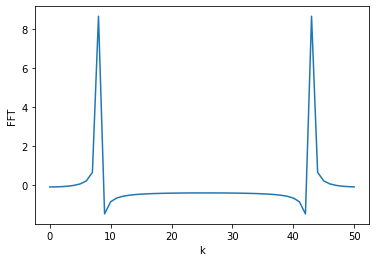

In [117]:
plt.plot(np.real(np.fft.fft(np.sin(xx))))
plt.xlabel('k')
plt.ylabel('FFT')
plt.show()

If we take the difference between the maximum in the DFT and the FFT is about 6. However, if we take the position of the first maximum of both the difference is about 0.4.

In [111]:
np.max(np.real(sin_dft(xx,kk)))-np.max(np.real((np.fft.fft(np.sin(xx)))))

6.617748225304837

In [118]:
ftsin=np.real(sin_dft(xx,kk))[0:20]
kk[0:20][np.max(ftsin)==ftsin]

array([7.57575758])

In [119]:
fftsin=np.real(np.fft.fft(np.sin(xx)))[0:20]
np.where(fftsin==np.max(fftsin))

(array([8], dtype=int64),)

In [120]:
8-7.57575758

0.4242424199999997

We can note that both Fourier Transform are about 0 for almost all values and have higher values near a certain k. Then, they are close to a delta function. However, in the DFT there are some peaks around the maximums.

d) I defined sin_dft_win to take $\sin(x)$ multiplied by the window function $0.5-0.5\cos(2\pi{x}/N)$, for this case I'm using the left-hand side of part a) for taking the DFT.

In [121]:
def sin_dft_win(x,k):
    N=len(x)
    f_ft=np.array([sum((0.5-0.5*np.cos(2*np.pi*x/N))*np.sin(x)*np.exp(-2*np.pi*l*(x)*1j/N)) for l in k])
    return(np.real(f_ft))

We can note that the peaks around the main peaks are reduced when windowing the $\sin(x)$.

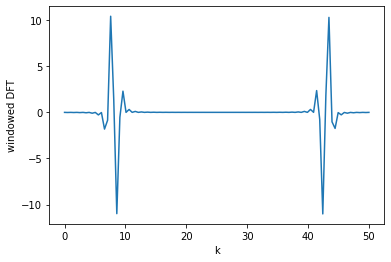

In [122]:
plt.plot(kk,sin_dft_win(xx,kk))
plt.xlabel('k')
plt.ylabel('windowed DFT')
plt.show()

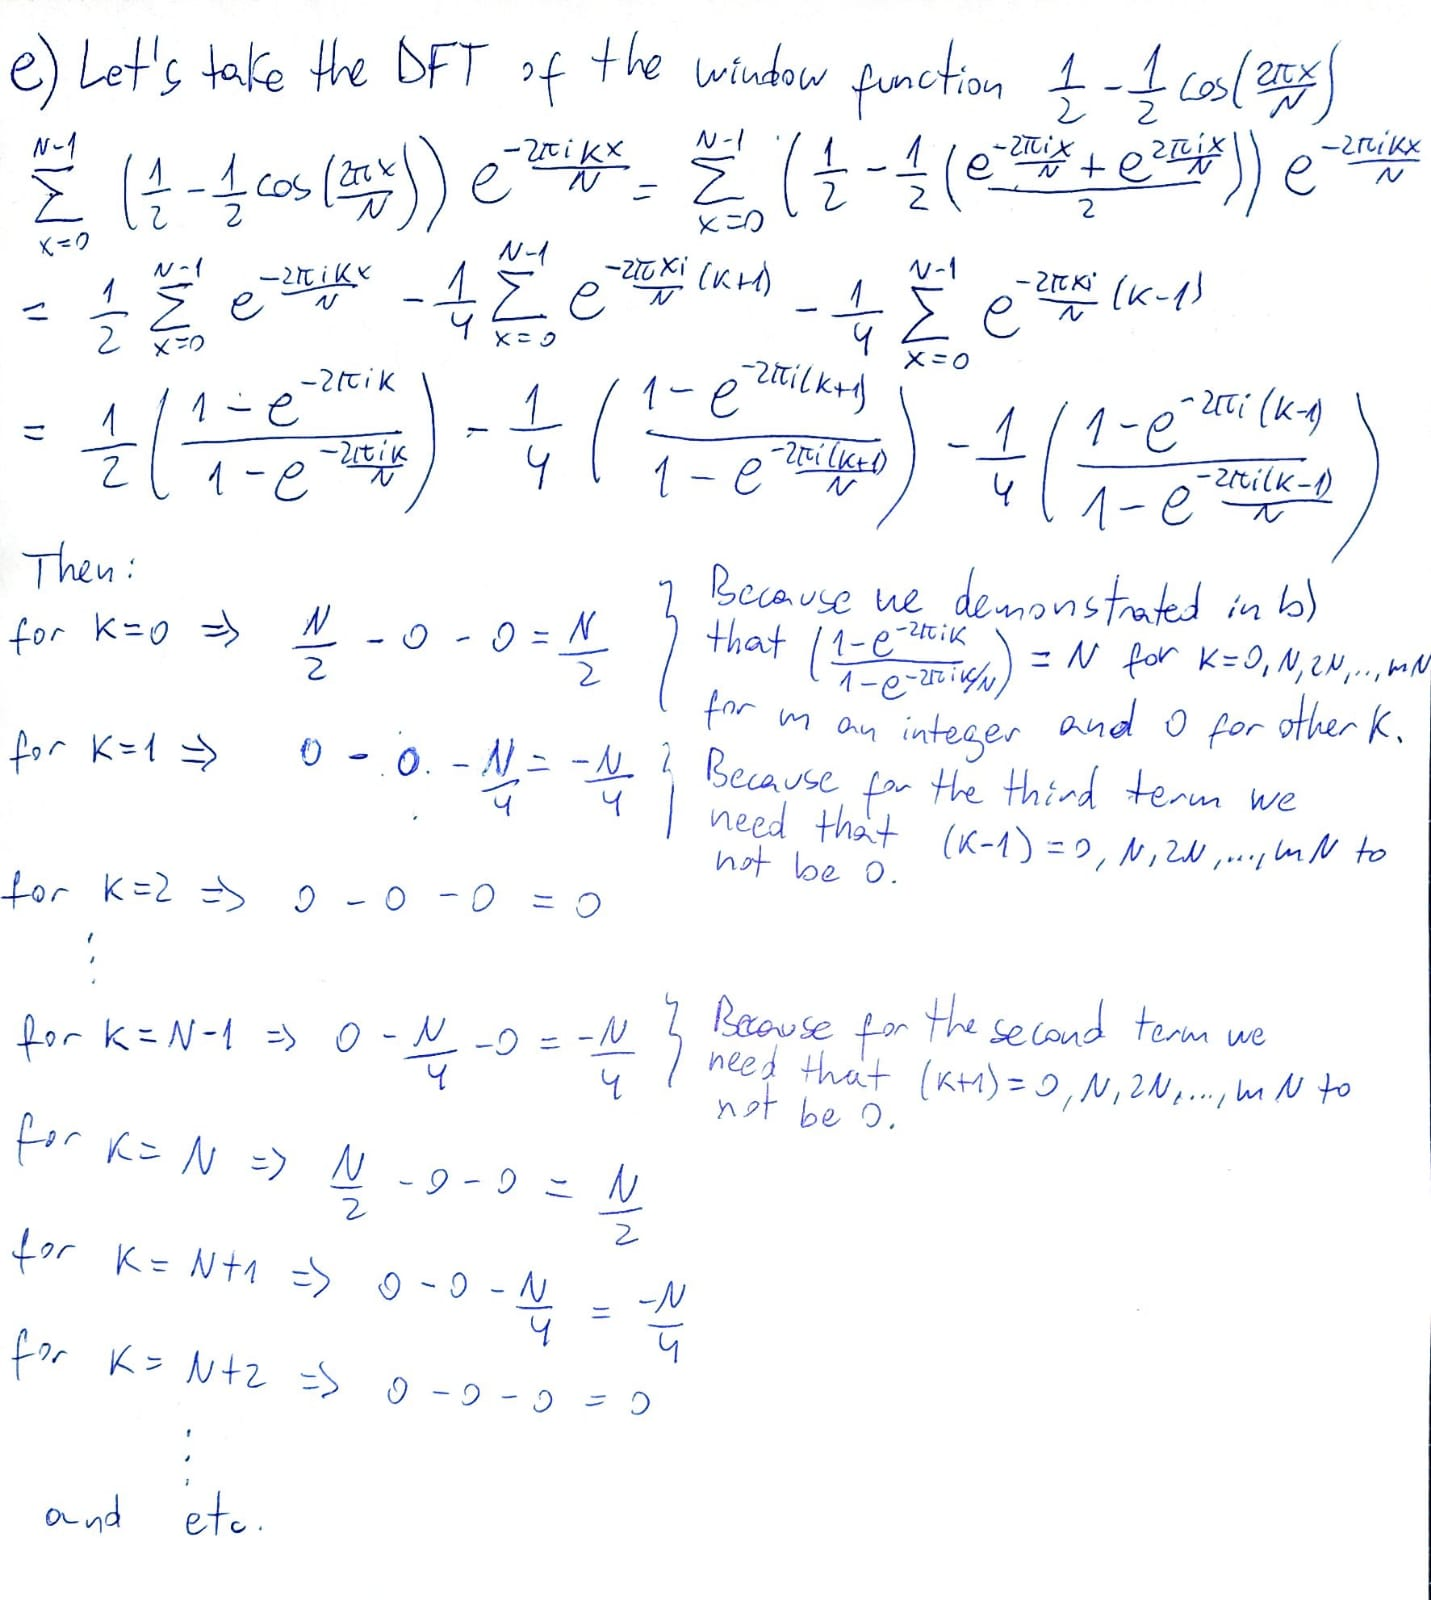

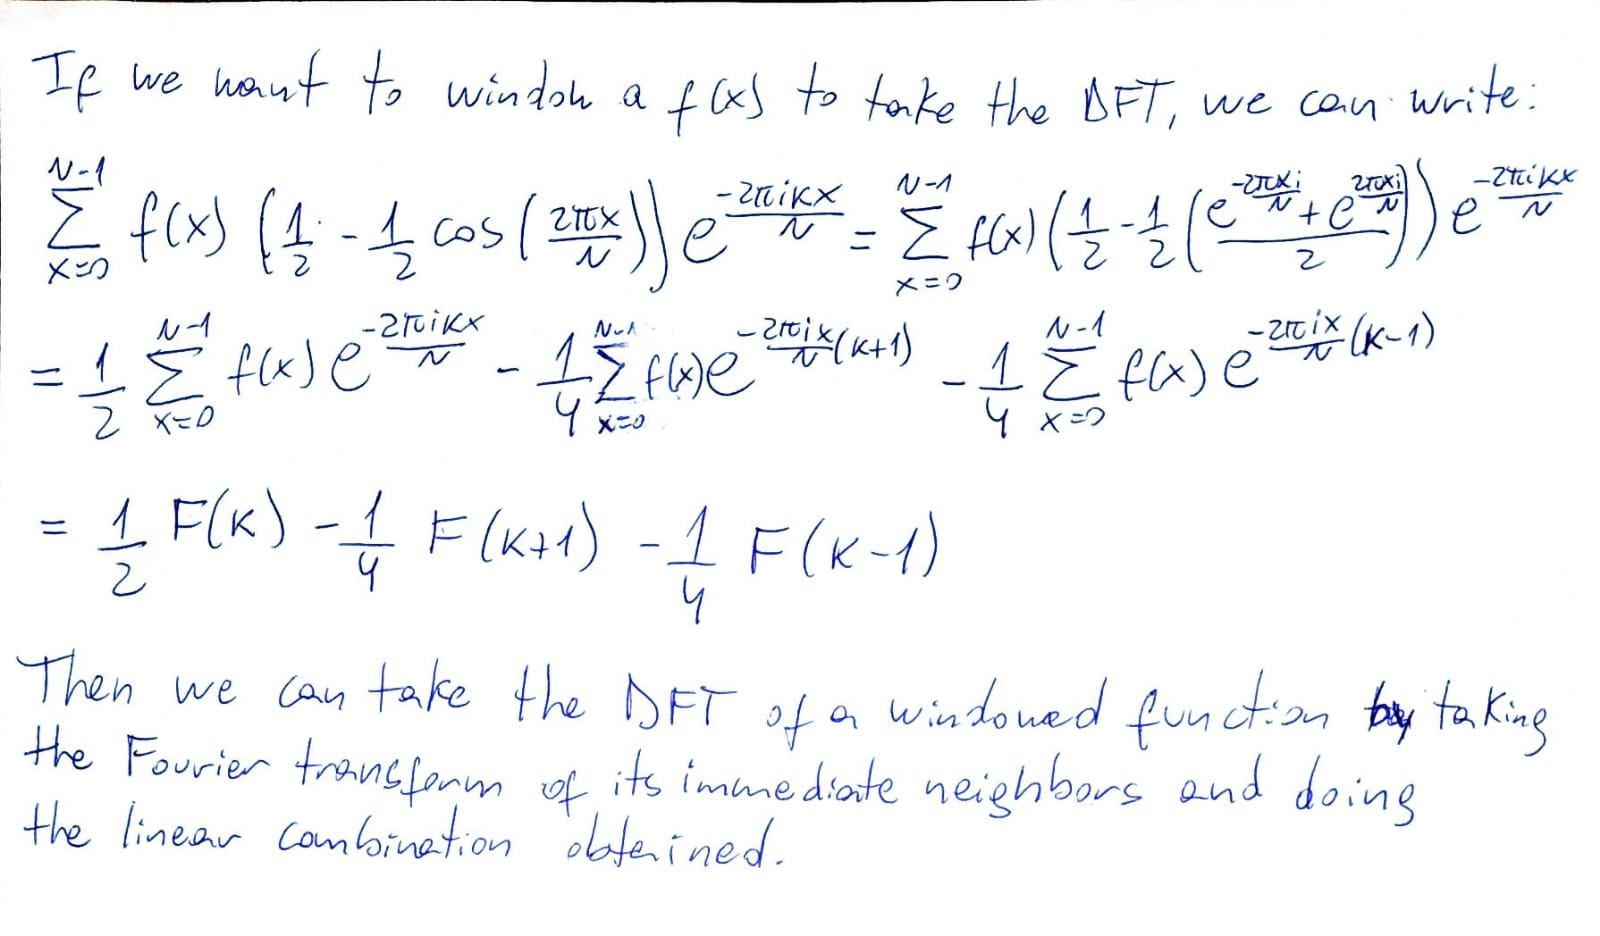

# Problem 5

For this problem I used the files in https://github.com/losc-tutorial/LOSC_Event_tutorial

In [123]:
import h5py
import glob
import json
from scipy import signal

C:\Users\Odette\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


a)

I used the routines that Professor Sievers provided for reading the LIGO data and templates.

In [124]:
def read_template(filename):
    dataFile=h5py.File(filename,'r')
    template=dataFile['template']
    tp=template[0]
    tx=template[1]
    return tp,tx
def read_file(filename):
    dataFile=h5py.File(filename,'r')
    dqInfo = dataFile['quality']['simple']
    qmask=dqInfo['DQmask'][...]

    meta=dataFile['meta']
    #gpsStart=meta['GPSstart'].value
    gpsStart=meta['GPSstart'][()]
    #print meta.keys()
    #utc=meta['UTCstart'].value
    utc=meta['UTCstart'][()]
    #duration=meta['Duration'].value
    duration=meta['Duration'][()]
    #print(duration)
    #strain=dataFile['strain']['Strain'].value
    strain=dataFile['strain']['Strain'][()]
    dt=(1.0*duration)/len(strain)

    dataFile.close()
    return strain,dt,utc

I defined the smooth_vector routine to receive the power spectrum and smooth it using a Gaussian kernel, i.e., we have to do a convolution of the power spectrum with the Gaussian kernel in the Fourier space. To have a properly normalized noise model I divided the smoothed noise model by the number of data points.

In [125]:
def smooth_vector(vec,sig):
    n=len(vec)
    #print(n)
    x=np.arange(n)
    x[n//2:]=x[n//2:]-n
    kernel=np.exp(-0.5*x**2/sig**2) #make a Gaussian kernel
    kernel=kernel/kernel.sum()
    vecft=np.fft.rfft(vec)#np.fft.rfft(vec)
    #vecft=vecft/np.sqrt(len(vec))#np.sqrt(len(vecft))
    #print(len(vecft))
    kernelft=np.fft.rfft(kernel)#np.fft.rfft(kernel)
    #kernelft=kernelft/np.sqrt(len(kernel))
    vec_smooth=np.fft.irfft(vecft*kernelft)#/(len(vecft))#np.fft.irfft(vecft*kernelft) #convolve the data with the kernel
    vec_smooth=vec_smooth/len(vec)#np.sqrt(len(vec_smooth))
    return vec_smooth

Below, I used the code in the LIGO tutorial to read the .json file and define 'events' with the properties for each event.  

In [126]:
# Read the event properties from a local json file
fnjson = "BBH_events_v3.json"
try:
    events = json.load(open(fnjson,"r"))
except IOError:
    print("Cannot find resource file "+fnjson)
    print("You can download it from https://www.gwosc.org/s/events/"+fnjson)
    print("Quitting.")
    quit()

# did the user select the eventname ?
#try: 
 #   events[eventname]
#except:
 #   print('You must select an eventname that is in '+fnjson+'! Quitting.')
  #  quit()

I defined event_names for each event and took the corresponding template in the list temp_names. Then, using what was read from the .json file I identified and saved the file names of the Hanford and Livingston for each event in the same order as they were in event_names. Then, each event in file_events has a sublist with the file name for Hanford and Livingston.

In [127]:
event_names = ['GW150914','GW151226','LVT151012','GW170104']
temp_names=[x+'_4_template.hdf5' for x in event_names]

In [128]:
file_events=[]
for i in event_names:
    file_events.append(np.array([events[i]['fn_H1'],events[i]['fn_L1']]))

Finally, using the file names I saved the strain data in the same order they were in file_events. I also printed the dt for each event and I saw that it is the same for every measurement, then I just defined it as a single variable.

In [129]:
data=[]
for i in file_events:
    strainH,dtH,utcH=read_file(i[0])
    strainL,dtL,utcL=read_file(i[1])
    print(dtH,dtL)
    dt=dtH
    data.append(np.array([strainH,strainL]))

0.000244140625 0.000244140625
0.000244140625 0.000244140625
0.000244140625 0.000244140625
0.000244140625 0.000244140625


Moreover, all the strains have the same length

In [130]:
for i in data:
    print(len(i[0]),len(i[1]))

131072 131072
131072 131072
131072 131072
131072 131072


In templates I saved the components of the templates for each event. 

In [131]:
templates=[]
for i in temp_names:
    tp,tx=read_template(i)
    templates.append([tp,tx])

I took the tukey signal from scipy for windowing the data. It is flat in the middle and decreases very quick in the edges. This function is also used in the LIGO tutorial.

In [132]:
dwindow = signal.tukey(templates[0][0].size, alpha=1./5)

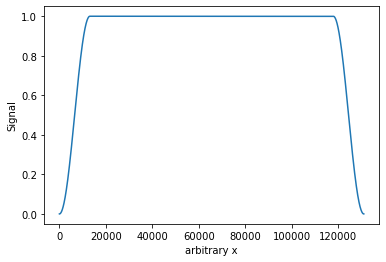

In [133]:
plt.plot(dwindow)
plt.xlabel('arbitrary x')
plt.ylabel('Signal')
plt.show()

I defined noise_ft to save the noise model in the Fourier space. First, I obtained the power spectrum of the windowed data $|FT(window\times data)|^{2}$, and then I smoothed it using the smooth_vector routine defined before.

In [134]:
#data*win->ft^2->covolve gauss
noise_ft=[]
for i in data:
    psh=np.abs(np.fft.rfft(dwindow*i[0]))**2 #H
    #psh=psh/(len(i[0]))#(len(psh))
    psl=np.abs(np.fft.rfft(dwindow*i[1]))**2 #L
    #psl=psl/(len(i[1]))#(len(psl))
    #len(psh)
    psh_sm=np.real(smooth_vector(psh,0.25*np.sqrt(len(psh))))
    psl_sm=np.real(smooth_vector(psl,0.25*np.sqrt(len(psl))))
    noise_ft.append(np.array([psh_sm,psl_sm]))
    

We must define the frequencies that correspond for every amplitude obtained for the Fourier transform. Then, I defined $d\nu=1/t_{obs}$ with $t_{obs}=n_{data}{dt}$

In [135]:
tobs=dt*len(data[0][0])
dnu=1/tobs
nu=np.arange(len(noise_ft[0][0]))*dnu
nu[0]=0.5*nu[1]

Below we have the noise model in the Fourier space for each event. In this case I took $\sqrt{PS}$ to compare with what is shown in the LIGO tutorial

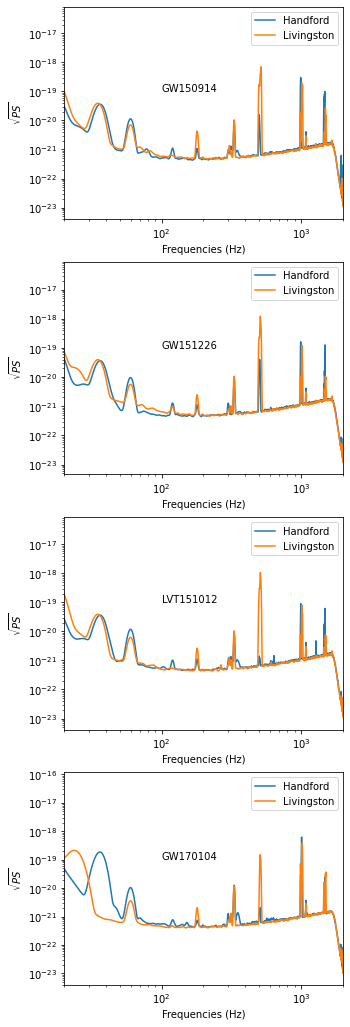

In [136]:
f,ax=plt.subplots(4,1,figsize=(5,18))
for i in range(0,4):
    ax[i].loglog(nu,np.sqrt(noise_ft[i][0]),label='Handford')
    ax[i].loglog(nu,np.sqrt(noise_ft[i][1]),label='Livingston')
    ax[i].set_xlabel('Frequencies (Hz)')
    ax[i].set_ylabel('$\sqrt{PS}$')
    ax[i].text(10**2,10**-19,event_names[i])
    ax[i].set_xlim(20,2000)
    ax[i].legend()

I used the frequencies between 20 Hz and 2000 Hz in the lots because the data is not well calibrated below 20 Hz and the data is not sensible to frequencies above 2000 Hz, this is mentioned in the LIGO tutorial as well. We can see that the range of the noise model is quite similar to what is shown in the tutorial.

b)

Below I defined Ni_template_ft to save $FT[N^{-1} A]$ for each event. We have to apply the window function to the template as well before doing the Fourier transform.

In [140]:
Ni_template_ft=[]
for i in range(len(templates)):
    H=(np.fft.rfft(dwindow*templates[i][0])[0:-1]/(noise_ft[i][0]))#/np.sqrt(len(templates[i][0])))) #H
    L=(np.fft.rfft(dwindow*templates[i][1])[0:-1]/(noise_ft[i][1]))#/np.sqrt(len(templates[i][1])))) #L
    Ni_template_ft.append(np.array([H,L]))

Now for each event and each detector we will have the output of the matched filter as $rhs=A^{T}N^{-1}d(x+dx)=IFT(FT^{*}[N^{-1}A]FT[d])$ and $lhs=A^{T}N^{-1}A=A^{T}IFT(FT[N^{-1} A])$, and then the estimation for the amplitude on the detection as $amp=rhs/lhs$, and the error of the amplitude as $err=1/\sqrt{lhs}$. The signal-to-noise ratio will be $SNR=amp/err$

In [141]:
rhs=[]
lhs=[]
for i in range(len(templates)):
    dt_h=(np.fft.rfft(dwindow*data[i][0]))#/np.sqrt(len(data[i][0]))#H
    dt_l=(np.fft.rfft(dwindow*data[i][1]))#/np.sqrt(len(data[i][1]))#L
    rhs_H=np.fft.irfft(np.conj(Ni_template_ft[i][0])*dt_h[0:-1])#/(len(dt_h))
    rhs_L=np.fft.irfft(np.conj(Ni_template_ft[i][1])*dt_l[0:-1])#/(len(dt_l))
    lhs_H=sum((templates[i][0])[0:-2]*np.fft.irfft(Ni_template_ft[i][0]))#/(len(templates[i][0])/2))
    lhs_L=sum((templates[i][1])[0:-2]*np.fft.irfft(Ni_template_ft[i][1]))#/(len(templates[i][1])/2))
    rhs.append(np.array([rhs_H,rhs_L]))
    lhs.append(np.array([lhs_H,lhs_L]))

c)

Below I show the plots for the SNR for each event.

In [144]:
t=dt*np.arange(len(data[0][0])-2)

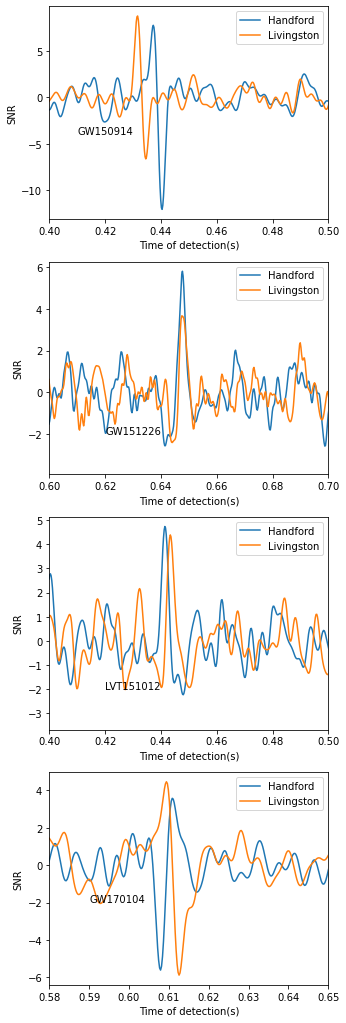

In [145]:
f,ax=plt.subplots(4,1,figsize=(5,18))
for i in range(0,4):
    ax[i].plot(t,(rhs[i][0]/np.sqrt(lhs[i][0])),label='Handford')
    ax[i].plot(t,(rhs[i][1]/np.sqrt(lhs[i][1])),label='Livingston')
    ax[i].set_xlabel('Time of detection(s)')
    ax[i].set_ylabel('SNR')
    #ax[i].text(10**2,10**-19,event_names[i])
    ax[i].legend()
ax[0].set_xlim(0.4,0.5)
ax[1].set_xlim(0.6,0.7)
ax[2].set_xlim(0.4,0.5)
ax[3].set_xlim(0.58,0.65)
ax[0].text(0.41,-4,event_names[0])
ax[1].text(0.62,-2,event_names[1])
ax[2].text(0.42,-2,event_names[2])
ax[3].text(0.59,-2,event_names[3])
plt.show()

For each event I estimated the SNR and the error from the analytic formulation for the noise model that we obtained.

In [146]:
for i in range(0,4):
    print('For event '+event_names[i]+':')
    print('error of Handford:'+str(1/np.sqrt(lhs[i][0])))
    print('SNR of Handford:'+str(np.max(rhs[i][0])/np.sqrt(lhs[i][0])))
    print('error of Livingston:'+str(1/np.sqrt(lhs[i][1])))
    print('SNR of Livingston:'+str(np.max(rhs[i][1])/np.sqrt(lhs[i][1])))
    print('error of combined H+L:'+str(np.sqrt(1/(lhs[i][0])+1/(lhs[i][1]))))
    print('SNR of combined H+L:'+str(np.sqrt(np.max(rhs[i][0])**2/lhs[i][0]+np.max(rhs[i][1])**2/lhs[i][1])))
    print('')
    

For event GW150914:
error of Handford:0.00010492847385602172
SNR of Handford:7.7254019704417205
error of Livingston:0.00011588155346841304
SNR of Livingston:8.725541517388482
error of combined H+L:0.00015632824140252618
SNR of combined H+L:11.654051243090315

For event GW151226:
error of Handford:0.00024885762049041497
SNR of Handford:5.787410580517982
error of Livingston:0.00031162134114342833
SNR of Livingston:3.6543559862744943
error of combined H+L:0.0003987956563607236
SNR of combined H+L:6.844591945610177

For event LVT151012:
error of Handford:0.00016912192291484868
SNR of Handford:4.7352844296231185
error of Livingston:0.00016709249264456176
SNR of Livingston:4.387398613709468
error of combined H+L:0.00023774382412291797
SNR of combined H+L:6.455399695217245

For event GW170104:
error of Handford:0.00013067339751052557
SNR of Handford:3.574291605130699
error of Livingston:9.383788697122183e-05
SNR of Livingston:4.458332409511263
error of combined H+L:0.00016087599525152168
SNR 

d)

Moreover, I compared what I obtained before with what I obtain if I take the error as the scatter in the matched filter in a region where there is not signal detected.

In [147]:
len(rhs[0][0])

131070

In [148]:
for i in range(0,4):
    print('For event '+event_names[i]+':')
    errH=np.std(rhs[i][0][-20000:]/lhs[i][0])
    errL=np.std(rhs[i][1][-20000:]/lhs[i][1])
    ampH=np.max(rhs[i][0])/lhs[i][0]
    ampL=np.max(rhs[i][1])/lhs[i][1]
    print('error of Handford:'+str(errH))
    print('SNR of Handford:'+str(ampH/errH))
    print('error of Livingston:'+str(errL))
    print('SNR of Livingston:'+str(ampL/errL))
    print('error of combined H+L:'+str(np.sqrt(errH**2+errL**2)))
    print('SNR of combined H+L:'+str(np.sqrt((ampH/errH)**2+(ampL/errL)**2)))
    print('')

For event GW150914:
error of Handford:7.549750563047957e-05
SNR of Handford:10.7369724590675
error of Livingston:8.383602926756872e-05
SNR of Livingston:12.060796709026134
error of combined H+L:0.00011282000336720848
SNR of combined H+L:16.147612666992902

For event GW151226:
error of Handford:0.0001817779964520947
SNR of Handford:7.923077897100232
error of Livingston:0.00022919838252930823
SNR of Livingston:4.968513742948231
error of combined H+L:0.00029253228633466916
SNR of combined H+L:9.352074217914636

For event LVT151012:
error of Handford:0.00012112494537808773
SNR of Handford:6.611688498903392
error of Livingston:0.00012449930118502167
SNR of Livingston:5.888397473818176
error of combined H+L:0.00017369895908842827
SNR of combined H+L:8.853680004167739

For event GW170104:
error of Handford:9.76920920098014e-05
SNR of Handford:4.780989106968023
error of Livingston:6.831790620840795e-05
SNR of Livingston:6.123731184729502
error of combined H+L:0.00011921023928317705
SNR of comb

We can see that the errors from taking the scatter in the matched filter are not very different compared to what we obtained before. However, we can see that this new errors are about a half of the old ones, then, the SNR increased by a factor <2. Therefore, our analytic form of the SNR is quite correct, but could be better. One way of improving our analytical noise profile from the power spectrum is to smooth the spikes in the power spectrum profile. 

Below, I put an example of a region where there is no signal, from the output of the matched filter.

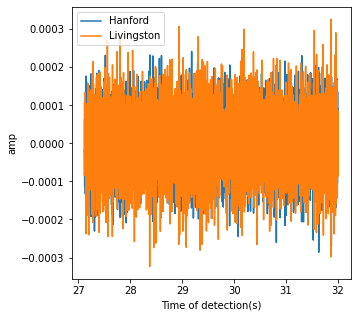

In [149]:
f,ax=plt.subplots(1,1,figsize=(5,5))
for i in range(0,1):
    ax.plot(t[-20000:],(rhs[i][0][-20000:]/(lhs[i][0])),label='Hanford')
    ax.plot(t[-20000:],(rhs[i][1][-20000:]/(lhs[i][1])),label='Livingston')
    ax.set_xlabel('Time of detection(s)')
    ax.set_ylabel('amp')
    ax.legend()

e)

Let's take the whitened template as $IFT(FT[N^{-1/2}A])$.

In [150]:
white_template=[]
white_template_ft=[]
for i in range(len(templates)):
    H=(np.fft.rfft(dwindow*templates[i][0])[0:-1]/np.sqrt(noise_ft[i][0]))#/np.sqrt(len(templates[i][0])) #H
    L=(np.fft.rfft(dwindow*templates[i][1])[0:-1]/np.sqrt(noise_ft[i][1]))#/np.sqrt(len(templates[i][1])) #L
    inH=np.fft.irfft(H)#/len(H)
    inL=np.fft.irfft(L)#/len(L)
    white_template.append(np.array([inH,inL]))
    white_template_ft.append(np.array([H,L]))

We can take the normalized cumulative distribution of the absolute value of the whitened template in the Fourier space to see the frequency where half the weight comes from above that frequency and half below. Therefore, we will look for the frequency where the cumulative distribution =0.5. There is a plot below with the cumulative distributions for each event.

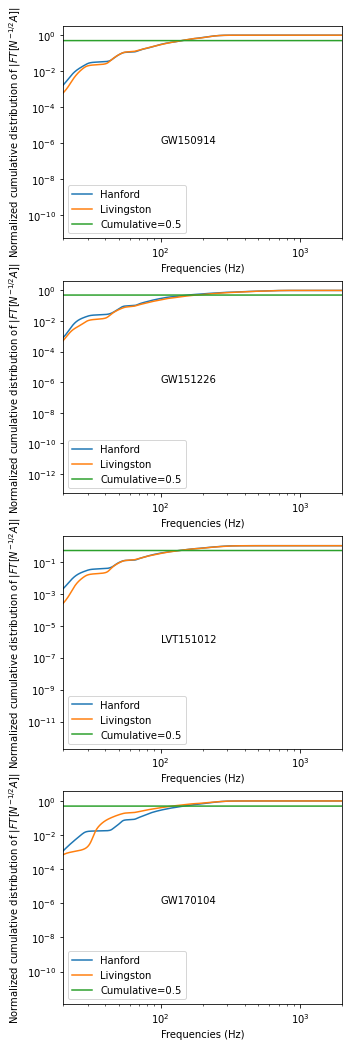

In [151]:
cm=[]
f,ax=plt.subplots(4,1,figsize=(5,18))
for i in range(0,4):
    cmH=np.cumsum(np.abs(white_template_ft[i][0]))/np.sum(np.abs(white_template_ft[i][0]))
    cmL=np.cumsum(np.abs(white_template_ft[i][1]))/np.sum(np.abs(white_template_ft[i][1]))
    cm.append(np.array([cmH,cmL]))
    ax[i].loglog(nu,cmH,label='Hanford')
    ax[i].loglog(nu,cmL,label='Livingston')
    ax[i].loglog(nu,[0.5]*len(cmL),label='Cumulative=0.5')
    ax[i].set_xlabel('Frequencies (Hz)')
    ax[i].set_ylabel('Normalized cumulative distribution of $|FT[N^{-1/2}A]|$')
    ax[i].text(10**2,10**-6,event_names[i])
    ax[i].set_xlim(20,2000)
    ax[i].legend()

In [152]:
for i in range(0,4):
    print('For event '+event_names[i]+':')
    print('Frequency half-weight of Handford:'+str(nu[cm[i][0]>=0.5][0]))
    print('Frequency half-weight of Livingston:'+str(nu[cm[i][1]>=0.5][0]))
    print('')

For event GW150914:
Frequency half-weight of Handford:141.75
Frequency half-weight of Livingston:141.28125

For event GW151226:
Frequency half-weight of Handford:157.0625
Frequency half-weight of Livingston:181.0625

For event LVT151012:
Frequency half-weight of Handford:135.78125
Frequency half-weight of Livingston:136.3125

For event GW170104:
Frequency half-weight of Handford:146.03125
Frequency half-weight of Livingston:120.71875



We can see that for all cases the frequency where half the weight comes from above that frequency and half below is about 130 Hz.

f)

We can obtain the shift in the time of arrival to the detectors taking the difference of the time where the peak in amplitude occurs for each detector. 

In [153]:
shift=[]
for i in range(0,4):
    print('For event '+event_names[i]+':')
    ampH=(rhs[i][0])/lhs[i][0]
    ampL=(rhs[i][1])/lhs[i][1]
    th=t[ampH==np.max(ampH)][0]
    tl=t[ampL==np.max(ampL)][0]
    print('Time of arrival (shift):'+str(np.abs(th-tl)))
    shift.append(np.abs(th-tl))

For event GW150914:
Time of arrival (shift):0.005615234375
For event GW151226:
Time of arrival (shift):0.000244140625
For event LVT151012:
Time of arrival (shift):0.001953125
For event GW170104:
Time of arrival (shift):0.00146484375


Let's take the following sketch where the circles are the detectors which are separated by a distance $D$, the black lines are the signal arriving to each detector with a difference of $ct$ where $c$ is the speed of light and $t$ the shift in time of arrival. Assuming that the signal arrived plane-parallel, the we can draw the orange line to form a right triangle.

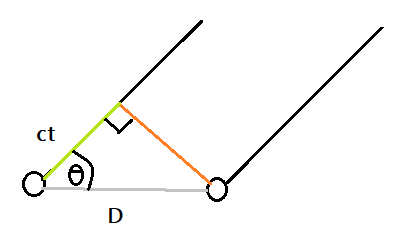

Then, the position $\theta$ of the event will be $\theta=\arccos(ct/D)$, and the uncertainty will be $\delta\theta=\frac{d\theta}{dt}\delta{t}=\frac{c}{\sqrt{D^{2}-(ct)^{2}}}\delta{t}$. Which works as long as $\delta t \approx t$ 

In [154]:
D=3*1000*1000
c=3*(10**8)
for i in range(0,4):
    print('For event '+event_names[i]+':')
    print('Approx position: '+str(np.arccos(c*shift[i]/D)))
    print('Estimation of uncertainty in position: '+str(c*shift[i]/np.sqrt(D**2-(c*shift[i])**2)))
    print('')

For event GW150914:
Approx position: 0.9745705752180331
Estimation of uncertainty in position: 0.6786102925001084

For event GW151226:
Approx position: 1.5463798383249396
Estimation of uncertainty in position: 0.02442134171183713

For event LVT151012:
Approx position: 1.374220250131753
Estimation of uncertainty in position: 0.19914787695514635

For event GW170104:
Approx position: 1.423782958825655
Estimation of uncertainty in position: 0.1480817350326294



For a larger shift in time we will have a larger uncertainty.